# FIAP - Tech Challenge - 004
---

### **Grupo 34**

- Cinthia Gonçalez da Silva
- Gabriel Huzian
- Karyne Barbosa Silva

### **O problema**

Imagine que você foi contratado como cientista de dados de um hospital e tem o desafio de desenvolver um modelo de Machine Learning para auxiliar os médicos e médicas a prever se uma pessoa pode ter obesidade.

Utilizando a base de dados disponibilizada neste desafio em **obesity.csv**, desenvolva um modelo preditivo e crie um sistema para auxiliar a tomada de decisão da equipe médica no diagnóstico da obesidade.

---

### **Entregáveis obrigatórios**
- ✅ Pipeline de machine learning demonstrando toda a etapa de feature engineering e treinamento do modelo.
- ✅ Modelo com assertividade acima de **75%**.
- ✅ Realizar o deploy do seu modelo em uma aplicação preditiva utilizando o **Streamlit**.
- ✅ Construir uma visão analítica em um painel com principais insights obtidos com o estudo sobre obesidade para trazer insights para a equipe médica.
- ✅ Compartilhar o link da sua aplicação deployada no app do Streamlit + link do painel analítico + link do repositório do seu github com todo código desenvolvido em um arquivo .doc ou .txt para realizar o upload na plataforma online.
- ✅ Gravar um vídeo mostrando toda a estratégia utilizada e apresentação do sistema preditivo (algo em torno de 4min - 10min). Não se esqueça que tanto a visão do sistema preditivo quanto o dashboard analítico deve ser apresentado em uma visão de negócio.

---





# Introdução

A obesidade é uma condição de saúde multifatorial que representa um dos principais desafios da saúde pública moderna, estando associada a diversas doenças crônicas e à redução da qualidade de vida.

Diante desse cenário, este projeto tem como objetivo desenvolver um modelo de Machine Learning capaz de auxiliar a equipe médica de um hospital na identificação do nível de obesidade de um paciente, com base em informações físicas, comportamentais e hábitos de vida.

O modelo proposto atua como uma ferramenta de apoio à tomada de decisão clínica, fornecendo uma estimativa do nível de obesidade a partir dos dados disponíveis, sem substituir a avaliação médica ou o diagnóstico profissional. A solução busca contribuir para uma abordagem mais preventiva e orientada por dados, permitindo que profissionais de saúde identifiquem perfis de risco, priorizem intervenções e apoiem estratégias de promoção da saúde de forma mais eficiente.

# Importanto Bibliotecas

In [58]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

# Carregando Base de Dados

In [59]:
df = pd.read_csv("C:\\Users\\cinth_bsfu\\Downloads\\obesity-project\\data\\obesity.csv")
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Dicionário de Dados

| Variável           | Descrição                                                                      |
| ------------------ | ------------------------------------------------------------------------------ |
| **Gender**         | Gênero do indivíduo                                                            |
| **Age**            | Idade (em anos)                                                                |
| **Height**         | Altura (em metros)                                                             |
| **Weight**         | Peso (em quilogramas)                                                          |
| **family_history** | Indica se há histórico familiar de excesso de peso                             |
| **FAVC**           | Frequência de consumo de alimentos altamente calóricos                         |
| **FCVC**           | Frequência de consumo de vegetais nas refeições                                |
| **NCP**            | Número de refeições principais realizadas diariamente                          |
| **CAEC**           | Consumo de alimentos entre as refeições                                        |
| **SMOKE**          | Indica se o indivíduo fuma                                                     |
| **CH2O**           | Quantidade de água consumida diariamente                                       |
| **SCC**            | Indica se o indivíduo monitora as calorias ingeridas                           |
| **FAF**            | Frequência de prática de atividade física                                      |
| **TUE**            | Tempo de uso de dispositivos tecnológicos (celular, computador, TV, videogame) |
| **CALC**           | Frequência de consumo de bebidas alcoólicas                                    |
| **MTRANS**         | Meio de transporte mais utilizado                                              |
| **Obesity**        | **Variável alvo** — nível de obesidade do indivíduo                            |


# EDA inicial
---
Nesta etapa, foi realizada a exploração inicial da base de dados de obesidade, composta por 2.111 registros e 17 variáveis, englobando informações físicas, comportamentais e hábitos de vida dos indivíduos. A análise permitiu identificar a presença de variáveis numéricas e categóricas, além de confirmar a inexistência de valores ausentes no conjunto de dados, o que reduz a necessidade de tratamentos complexos de limpeza. A variável alvo apresentou uma distribuição relativamente balanceada entre os diferentes níveis de obesidade, caracterizando um problema de classificação multiclasse adequado para modelagem supervisionada. Essa etapa foi fundamental para compreender a estrutura dos dados, orientar as decisões de pré-processamento e embasar análises futuras voltadas à equipe médica.

## Visão Geral do Dataset

In [60]:
df.shape

(2111, 17)

In [61]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   str    
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   str    
 5   FAVC            2111 non-null   str    
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   str    
 9   SMOKE           2111 non-null   str    
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   str    
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   str    
 15  MTRANS          2111 non-null   str    
 16  Obesity         2111 non-null   str    
dtypes: float64(8), str(9)
memory usage: 280.5 KB

In [62]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [63]:
df.describe(include="object")

C:\Users\cinth_bsfu\AppData\Local\Temp\ipykernel_9860\702825166.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  df.describe(include="object")


,Gender,family_history,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,Obesity
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


In [64]:
df.isnull().sum()

Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64

## Análise Preliminar da Variável Target

In [65]:
df["Obesity"].value_counts() 

Obesity
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [66]:
df["Obesity"].value_counts(normalize=True) * 100

Obesity
Obesity_Type_I         16.627191
Obesity_Type_III       15.348176
Obesity_Type_II        14.069162
Overweight_Level_I     13.737565
Overweight_Level_II    13.737565
Normal_Weight          13.595452
Insufficient_Weight    12.884889
Name: proportion, dtype: float64

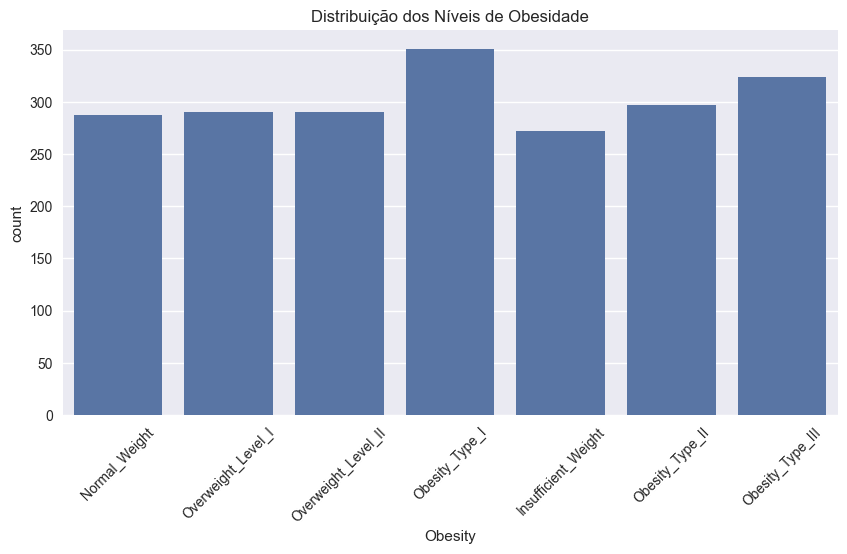

In [67]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Obesity")
plt.xticks(rotation=45)
plt.title("Distribuição dos Níveis de Obesidade")
plt.show()

## Idade vs Obesidade

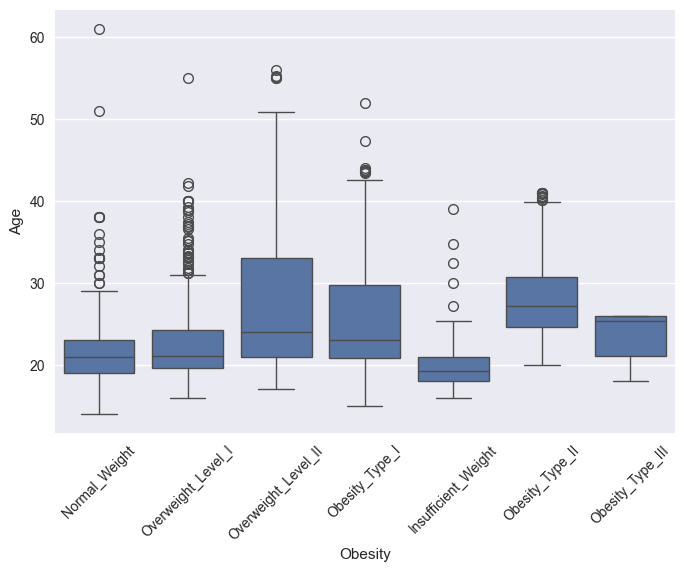

In [68]:
sns.boxplot(data=df, x="Obesity", y="Age")
plt.xticks(rotation=45)
plt.show()


## Genero vs Obesidade

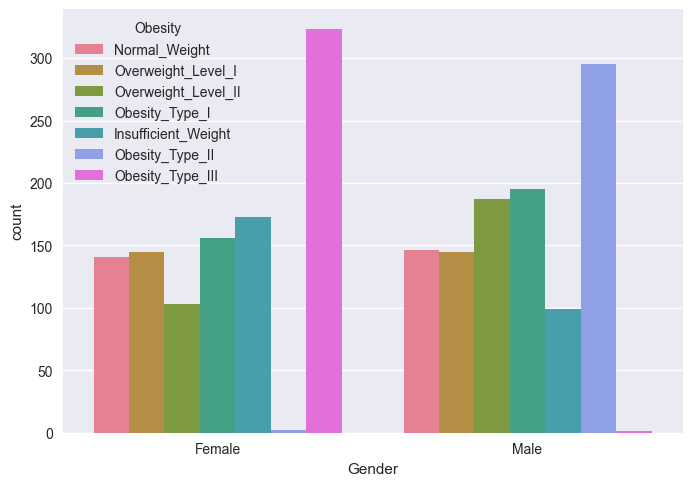

In [69]:
sns.countplot(data=df, x="Gender", hue="Obesity")
plt.show()

## Atividade Física vs Obesidade

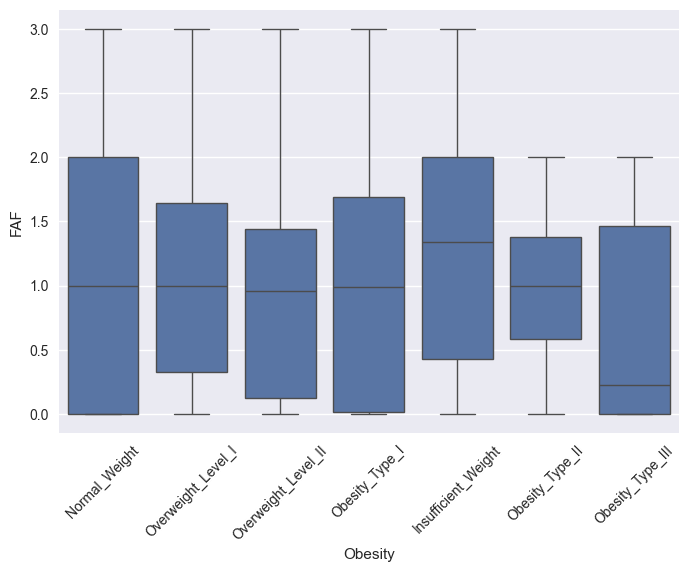

In [70]:
sns.boxplot(data=df, x="Obesity", y="FAF")
plt.xticks(rotation=45)
plt.show()


# Limpeza e Pré-processamento dos Dados
---
Nesta etapa, foi realizado o pré-processamento inicial dos dados, incluindo a separação entre variáveis explicativas (features) e a variável alvo (target), bem como a identificação das variáveis numéricas e categóricas. As features categóricas foram mapeadas para posterior aplicação de técnicas de codificação, enquanto as variáveis numéricas foram separadas para padronização. Em seguida, o conjunto de dados foi dividido em bases de treino e teste utilizando uma estratégia estratificada, garantindo a preservação da distribuição das classes da variável alvo. Esse processo assegura que os dados estejam adequadamente preparados para a etapa de modelagem, evitando vieses e vazamento de informação.

## Separação de Features e Target

In [71]:
X = df.drop(columns=["Obesity"])
y = df["Obesity"]

X.shape, y.shape


((2111, 16), (2111,))

## Separação de Variáveis Categóricas vs Numéricas
---

- **Variáveis categóricas**: usamos `One-Hot Encoding`, pois não existe hierarquia clara entre categorias e assim evitamos viés numérico artificial.

- **Variáveis numéricas**: usamos `StandardScaler`, pois modelos como regressão logística e SVM são sensíveis à escala e a padronização facilita convergência e comparação.

Ps.: As técnicas de codificação de variáveis categóricas e padronização de variáveis numéricas não foram aplicadas diretamente nas etapas iniciais de exploração e preparação dos dados, de forma intencional. Essas transformações serão incorporadas posteriormente dentro de uma pipeline de Machine Learning, garantindo reprodutibilidade, prevenção de vazamento de dados e consistência entre as fases de treino, teste e deploy do modelo em produção.

In [72]:
categorical_features = X.select_dtypes(include="object").columns.tolist()
numerical_features = X.select_dtypes(exclude="object").columns.tolist()

categorical_features, numerical_features


C:\Users\cinth_bsfu\AppData\Local\Temp\ipykernel_9860\1863982881.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_features = X.select_dtypes(include="object").columns.tolist()


(['Gender',
  'family_history',
  'FAVC',
  'CAEC',
  'SMOKE',
  'SCC',
  'CALC',
  'MTRANS'],
 ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'])

## Split de Treino e Teste

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape


((1688, 16), (423, 16))

# Feature Engineering
---
Nesta etapa, foi desenvolvida uma pipeline completa de Machine Learning utilizando técnicas de pré-processamento integradas ao modelo. As variáveis numéricas foram padronizadas com StandardScaler, enquanto as variáveis categóricas foram transformadas por meio de One-Hot Encoding, garantindo consistência entre as fases de treino, teste e deploy. Como modelo baseline, foi utilizada a Regressão Logística, adequada para problemas de classificação multiclasse e de fácil interpretação no contexto da saúde. O modelo apresentou uma acurácia de 87%, com bom desempenho especialmente na identificação dos níveis mais críticos de obesidade, atendendo plenamente aos requisitos do projeto.

## Importação dos componentes

In [74]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

## Pré-processamento (OneHotEncoder & StandardScaler)

In [75]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)


## Definição do Modelo - Regressão Logística

In [76]:
model = LogisticRegression(
    max_iter=1000,
    solver="lbfgs"
)

## Pipeline

In [77]:
pipeline = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("model", model)
    ]
)


## Treino

In [78]:
pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers c

## Avaliação

In [79]:
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy


0.8747044917257684

In [80]:
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.92      1.00      0.96        54
      Normal_Weight       0.81      0.74      0.77        58
     Obesity_Type_I       0.88      0.91      0.90        70
    Obesity_Type_II       0.94      0.97      0.95        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.74      0.74      0.74        58
Overweight_Level_II       0.81      0.76      0.79        58

           accuracy                           0.87       423
          macro avg       0.87      0.87      0.87       423
       weighted avg       0.87      0.87      0.87       423



## Teste de Overfitting
---
Para avaliar a possibilidade de overfitting, foi realizada a comparação entre a performance do modelo nos conjuntos de treino e teste. A acurácia obtida no treino foi de aproximadamente 91%, enquanto no conjunto de teste foi de 87%, resultando em uma diferença de cerca de 4%. Essa variação é considerada aceitável e indica que o modelo apresenta boa capacidade de generalização, não havendo evidências de overfitting significativo.

In [81]:
y_train_pred = pipeline.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_accuracy


0.9075829383886256

## Teste de outros modelos
---
Nesta etapa, foram avaliados diferentes algoritmos de classificação com o objetivo de comparar o desempenho do modelo baseline. Além da Regressão Logística, foram treinados modelos de Random Forest e Gradient Boosting, utilizando a mesma pipeline de pré-processamento para garantir uma comparação justa. Ambos os modelos apresentaram melhora significativa de desempenho, com destaque para o Gradient Boosting, que alcançou aproximadamente 95% de acurácia e apresentou resultados equilibrados entre todas as classes da variável alvo. Com base nesses resultados, o modelo de Gradient Boosting foi selecionado como modelo final do projeto, considerando seu melhor desempenho preditivo e sua adequação ao problema proposto.

### Importações

In [82]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

### Random Forest

In [83]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

In [84]:
rf_pipeline = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("model", rf_model)
    ]
)


In [85]:
rf_pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers c

In [86]:
rf_pred = rf_pipeline.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_accuracy


0.9432624113475178

In [87]:
print(classification_report(y_test, rf_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.94      0.97        54
      Normal_Weight       0.78      0.93      0.85        58
     Obesity_Type_I       0.97      0.96      0.96        70
    Obesity_Type_II       1.00      0.98      0.99        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.91      0.86      0.88        58
Overweight_Level_II       0.96      0.93      0.95        58

           accuracy                           0.94       423
          macro avg       0.95      0.94      0.94       423
       weighted avg       0.95      0.94      0.94       423



### Gradient Boosting - Modelo final escolhido

In [88]:
gb_model = GradientBoostingClassifier(random_state=42)

In [89]:
gb_pipeline = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("model", gb_model)
    ]
)

In [90]:
gb_pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers c

In [91]:
gb_pred = gb_pipeline.predict(X_test)

gb_accuracy = accuracy_score(y_test, gb_pred)
gb_accuracy

0.950354609929078

In [92]:
print(classification_report(y_test, gb_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.91      0.95        54
      Normal_Weight       0.84      0.97      0.90        58
     Obesity_Type_I       0.96      0.96      0.96        70
    Obesity_Type_II       0.97      0.97      0.97        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.93      0.90      0.91        58
Overweight_Level_II       0.98      0.97      0.97        58

           accuracy                           0.95       423
          macro avg       0.95      0.95      0.95       423
       weighted avg       0.95      0.95      0.95       423



### Justificativa da Escolha do Modelo (Gradient Boosting)
---
Embora a acurácia seja uma métrica importante, ela não foi utilizada como critério único para a escolha do modelo. Considerando o contexto de saúde, foram analisadas métricas como recall, precision e F1-score por classe, além das médias macro e ponderada. O modelo de Gradient Boosting apresentou desempenho consistente e equilibrado entre todas as classes, com elevada capacidade de identificar corretamente os níveis mais críticos de obesidade, sendo, portanto, escolhido como modelo final do projeto.

In [93]:
report_dict = classification_report(
    y_test,
    gb_pred,          # use rf_pred se quiser Random Forest
    output_dict=True
)


In [94]:
report_df = pd.DataFrame(report_dict).transpose()
report_df

,precision,recall,f1-score,support
Insufficient_Weight,1.000000,0.907407,0.951456,54.000000
Normal_Weight,0.835821,0.965517,0.896000,58.000000
Obesity_Type_I,0.957143,0.957143,0.957143,70.000000
Obesity_Type_II,0.966667,0.966667,0.966667,60.000000
Obesity_Type_III,1.000000,0.984615,0.992248,65.000000
Overweight_Level_I,0.928571,0.896552,0.912281,58.000000
Overweight_Level_II,0.982456,0.965517,0.973913,58.000000
accuracy,0.950355,0.950355,0.950355,0.950355
macro avg,0.952951,0.949060,0.949958,423.000000
weighted avg,0.953469,0.950355,0.950927,423.000000


In [95]:
report_df = report_df.round(3)
report_df

,precision,recall,f1-score,support
Insufficient_Weight,1.000,0.907,0.951,54.00
Normal_Weight,0.836,0.966,0.896,58.00
Obesity_Type_I,0.957,0.957,0.957,70.00
Obesity_Type_II,0.967,0.967,0.967,60.00
Obesity_Type_III,1.000,0.985,0.992,65.00
Overweight_Level_I,0.929,0.897,0.912,58.00
Overweight_Level_II,0.982,0.966,0.974,58.00
accuracy,0.950,0.950,0.950,0.95
macro avg,0.953,0.949,0.950,423.00
weighted avg,0.953,0.950,0.951,423.00


# Salvamento do Modelo Final
---
Nesta etapa, o modelo final selecionado foi encapsulado em uma pipeline completa, contendo todas as etapas de pré-processamento e classificação. A pipeline treinada foi serializada utilizando a biblioteca joblib e armazenada em um diretório dedicado a artefatos de Machine Learning, separado dos notebooks exploratórios. Em seguida, foi realizado um teste de carregamento e predição com sucesso, confirmando que o modelo está pronto para ser integrado a uma aplicação preditiva em ambiente de produção.

## Garantindo a escolha do modelo e o treinamento correto

In [96]:
gb_model = GradientBoostingClassifier(random_state=42)

gb_pipeline = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("model", gb_model)
    ]
)


In [97]:
gb_pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers c

## Salvando com JobLib

In [98]:
import os
import joblib

cwd = os.getcwd()
# If running from the `notebooks/` directory, move up one level to project root
if os.path.basename(cwd).lower() == "notebooks":
    project_root = os.path.abspath(os.path.join(cwd, ".."))
else:
    project_root = cwd

models_dir = os.path.join(project_root, "models")
os.makedirs(models_dir, exist_ok=True)
model_path = os.path.join(models_dir, "obesity_model.pkl")
joblib.dump(gb_pipeline, model_path)
print(f"Saved: {model_path}")


Saved: c:\Users\cinth_bsfu\Downloads\obesity-project\models\obesity_model.pkl


## Teste de carregamento

In [101]:
loaded_model = joblib.load("C:/Users/cinth_bsfu/Downloads/obesity-project/models/obesity_model.pkl")

In [102]:
test_pred = loaded_model.predict(X_test.iloc[:5])
test_pred

array(['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_II',
       'Obesity_Type_III', 'Obesity_Type_II'], dtype=object)